# **Tarea: Árboles de decisión**

Nombre: Puente López Gandhi Yael

*Adición de bibliotecas para el funcionamiento*

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

#### **DIABETES**

* Creación del objeto para el manejo de la data

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


* Obtención de la información de la data y sus características estadísticas

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [4]:
diabetes.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


* Conteo de los valores existentes para el campo class

In [5]:
diabetes["class"].value_counts()

tested_negative    500
tested_positive    268
Name: class, dtype: int64

* Preparación de los datos para el entrenamiento de los modelos

* De igual modo, realizamos el entrenamiento del modelo, colocando el 80% de los datos para entrenar el modelo y el 20% para validar su funcionamiento. Esta elección para ambos casos se hará de manera aleatoria

In [6]:
y_diabetes = diabetes['class']
x_diabetes = diabetes.drop(['class'], axis=1)

In [7]:
x_diabetes_train, x_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(x_diabetes,
                                                                                        y_diabetes,
                                                                                        test_size = 0.2,
                                                                                        random_state = 1234,
                                                                                        shuffle = True)

* Se realiza la configuración para el clasificador de árbol de decisión de acuerdo a como se menciona en el documento

* Tambien entrenamos el clasificador a partir de los datos de entrenamiento X e Y

In [8]:
clf_one_level_diabetes = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 1)
clf_one_level_diabetes = clf_one_level_diabetes.fit(x_diabetes_train,y_diabetes_train)

* Posteriormente obtenemos los valores predichos de acuerdo al clasificador de árbol de decisión.

* Finalmente obtenemos el % de precisión de acuerdo a los valores predichos y los datos de validación

In [9]:
y_predict_one_level_diabetes = clf_one_level_diabetes.predict(x_diabetes_test)

In [10]:
acc_diabetes = accuracy_score(y_diabetes_test,y_predict_one_level_diabetes)
print(acc_diabetes)

0.7142857142857143


* Se realizan los mismos pasos pero en esta ocasión consideraremos la configuración para árboles de decisión multi-nivel

In [11]:
clf_multi_level_diabetes = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = None)
clf_multi_level_diabetes = clf_multi_level_diabetes.fit(x_diabetes_train,y_diabetes_train)

In [12]:
y_predict_multi_level_diabetes = clf_multi_level_diabetes.predict(x_diabetes_test)

In [13]:
acc_multi_diabetes = accuracy_score(y_diabetes_test,y_predict_multi_level_diabetes)
print(acc_multi_diabetes)

0.7207792207792207


* Guardado en un arreglo el % de precisión para el árbol de decisión multi-nivel

In [14]:
arr_accu_diabetes = []

#1
clf_multi_level_diabetes_1 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
clf_multi_level_diabetes_1 = clf_multi_level_diabetes_1.fit(x_diabetes_train,y_diabetes_train)
y_predict_multi_level_diabetes_1 = clf_multi_level_diabetes_1.predict(x_diabetes_test)
acc_multi_diabetes_1 = accuracy_score(y_diabetes_test,y_predict_multi_level_diabetes_1)
arr_accu_diabetes.append(acc_multi_diabetes_1)


#2
clf_multi_level_diabetes_2 = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = None)
clf_multi_level_diabetes_2 = clf_multi_level_diabetes_2.fit(x_diabetes_train,y_diabetes_train)
y_predict_multi_level_diabetes_2 = clf_multi_level_diabetes_2.predict(x_diabetes_test)
acc_multi_diabetes_2 = accuracy_score(y_diabetes_test,y_predict_multi_level_diabetes_2)
arr_accu_diabetes.append(acc_multi_diabetes_2)

#3
clf_multi_level_diabetes_3 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
clf_multi_level_diabetes_3 = clf_multi_level_diabetes_3.fit(x_diabetes_train,y_diabetes_train)
y_predict_multi_level_diabetes_3 = clf_multi_level_diabetes_3.predict(x_diabetes_test)
acc_multi_diabetes_3 = accuracy_score(y_diabetes_test,y_predict_multi_level_diabetes_3)
arr_accu_diabetes.append(acc_multi_diabetes_3)

#4
clf_multi_level_diabetes_4 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
clf_multi_level_diabetes_4 = clf_multi_level_diabetes_4.fit(x_diabetes_train,y_diabetes_train)
y_predict_multi_level_diabetes_4 = clf_multi_level_diabetes_4.predict(x_diabetes_test)
acc_multi_diabetes_4 = accuracy_score(y_diabetes_test,y_predict_multi_level_diabetes_4)
arr_accu_diabetes.append(acc_multi_diabetes_4)

#5
clf_multi_level_diabetes_5 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
clf_multi_level_diabetes_5 = clf_multi_level_diabetes_5.fit(x_diabetes_train,y_diabetes_train)
y_predict_multi_level_diabetes_5 = clf_multi_level_diabetes_5.predict(x_diabetes_test)
acc_multi_diabetes_5 = accuracy_score(y_diabetes_test,y_predict_multi_level_diabetes_5)
arr_accu_diabetes.append(acc_multi_diabetes_5)

* Gráfica de la precisión de acuerdo al número min_samples_leaf

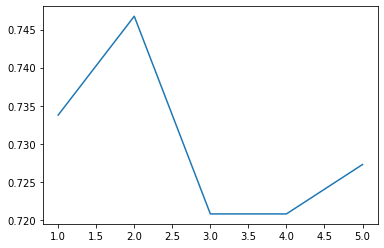

In [15]:
min_leaf = [1,2,3,4,5]
plt.plot(min_leaf,arr_accu_diabetes)
plt.show()

#### **VIDRIO**

* Para el caso de la data de vidrio omitiré la explicación de todo lo realizado, ya que prácticamente es el mismo procedimiento que se realizó con la data de Diabetes. El resultado se puede observar de igual manera que en el anterior ejercicio

In [16]:
vidrio = pd.read_csv('glass.csv')
vidrio.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,'build wind non-float'


In [17]:
vidrio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [18]:
vidrio.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [19]:
vidrio["class"].value_counts()

'build wind non-float'    76
'build wind float'        70
headlamps                 29
'vehic wind float'        17
containers                13
tableware                  9
Name: class, dtype: int64

In [20]:
y_vidrio = vidrio['class']
x_vidrio = vidrio.drop(['class'],axis=1)

In [21]:
x_vidrio_train, x_vidrio_test, y_vidrio_train, y_vidrio_test = train_test_split(x_vidrio, y_vidrio,
                                                                            test_size = 0.2,
                                                                            random_state = 1234,
                                                                            shuffle = True)

In [22]:
clf_one_level_vidrio = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 1)
clf_one_level_vidrio = clf_one_level_vidrio.fit(x_vidrio_train,y_vidrio_train)

In [23]:
y_predict_one_level_vidrio = clf_one_level_vidrio.predict(x_vidrio_test)

In [24]:
acc_vidrio = accuracy_score(y_vidrio_test,y_predict_one_level_vidrio)
print(acc_vidrio)

0.46511627906976744


In [25]:
clf_multi_level_vidrio = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = None)
clf_multi_level_vidrio = clf_multi_level_vidrio.fit(x_vidrio_train,y_vidrio_train)

In [26]:
y_predict_multi_level_vidrio = clf_multi_level_vidrio.predict(x_vidrio_test)

In [27]:
acc_multi_vidrio = accuracy_score(y_vidrio_test,y_predict_multi_level_vidrio)
print(acc_multi_vidrio)

0.6744186046511628


In [28]:
arr_accu_vidrio = []


# Modificando min_samples_leaf = 1
clf_multi_level_vidrio_1 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
clf_multi_level_vidrio_1 = clf_multi_level_vidrio_1.fit(x_vidrio_train,y_vidrio_train)
y_predict_multi_level_vidrio_1 = clf_multi_level_vidrio_1.predict(x_vidrio_test)
acc_multi_vidrio_1 = accuracy_score(y_vidrio_test,y_predict_multi_level_vidrio_1)
arr_accu_vidrio.append(acc_multi_vidrio_1)
                                                            
#2
clf_multi_level_vidrio_2 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
clf_multi_level_vidrio_2 = clf_multi_level_vidrio_2.fit(x_vidrio_train,y_vidrio_train)
y_predict_multi_level_vidrio_2 = clf_multi_level_vidrio_2.predict(x_vidrio_test)
acc_multi_vidrio_2 = accuracy_score(y_vidrio_test,y_predict_multi_level_vidrio_2)
arr_accu_vidrio.append(acc_multi_vidrio_2)

#3
clf_multi_level_vidrio_3 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
clf_multi_level_vidrio_3 = clf_multi_level_vidrio_3.fit(x_vidrio_train,y_vidrio_train)
y_predict_multi_level_vidrio_3 = clf_multi_level_vidrio_3.predict(x_vidrio_test)
acc_multi_vidrio_3 = accuracy_score(y_vidrio_test,y_predict_multi_level_vidrio_3)
arr_accu_vidrio.append(acc_multi_vidrio_3)

#4
clf_multi_level_vidrio_4 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
clf_multi_level_vidrio_4 = clf_multi_level_vidrio_4.fit(x_vidrio_train,y_vidrio_train)
y_predict_multi_level_vidrio_4 = clf_multi_level_vidrio_4.predict(x_vidrio_test)
acc_multi_vidrio_4 = accuracy_score(y_vidrio_test,y_predict_multi_level_vidrio_4)
arr_accu_vidrio.append(acc_multi_vidrio_4)

#5
clf_multi_level_vidrio_5 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
clf_multi_level_vidrio_5 = clf_multi_level_vidrio_5.fit(x_vidrio_train,y_vidrio_train)
y_predict_multi_level_vidrio_5 = clf_multi_level_vidrio_5.predict(x_vidrio_test)
acc_multi_vidrio_5 = accuracy_score(y_vidrio_test,y_predict_multi_level_vidrio_5)
arr_accu_vidrio.append(acc_multi_vidrio_5)

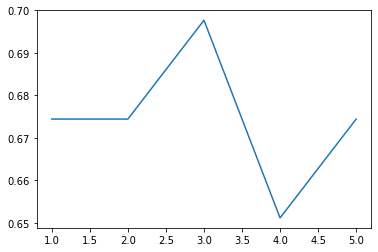

In [29]:
min_leaf = [1,2,3,4,5]
plt.plot(min_leaf,arr_accu_vidrio)
plt.show()